# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

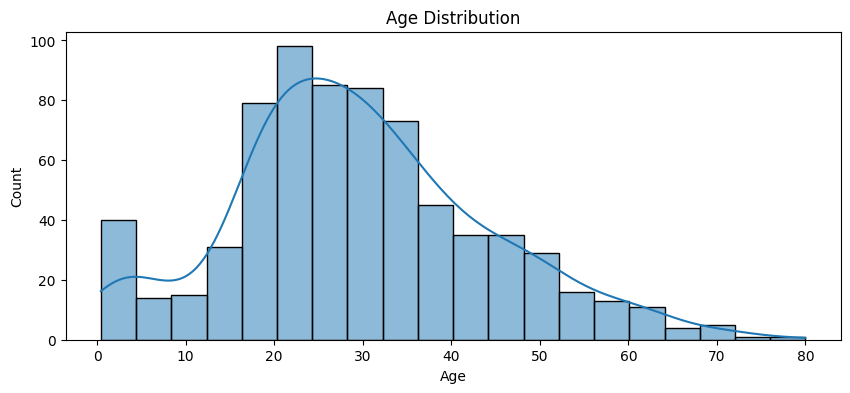

In [9]:
plt.figure(figsize=(10,4))
sns.histplot(train['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

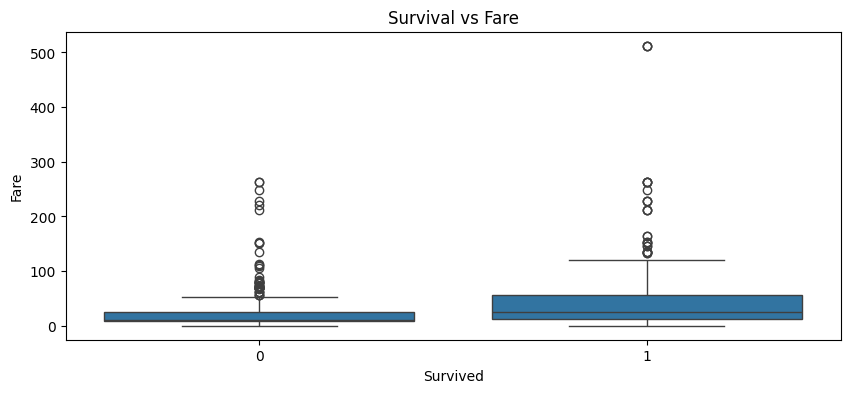

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Survival vs Fare')
plt.show()

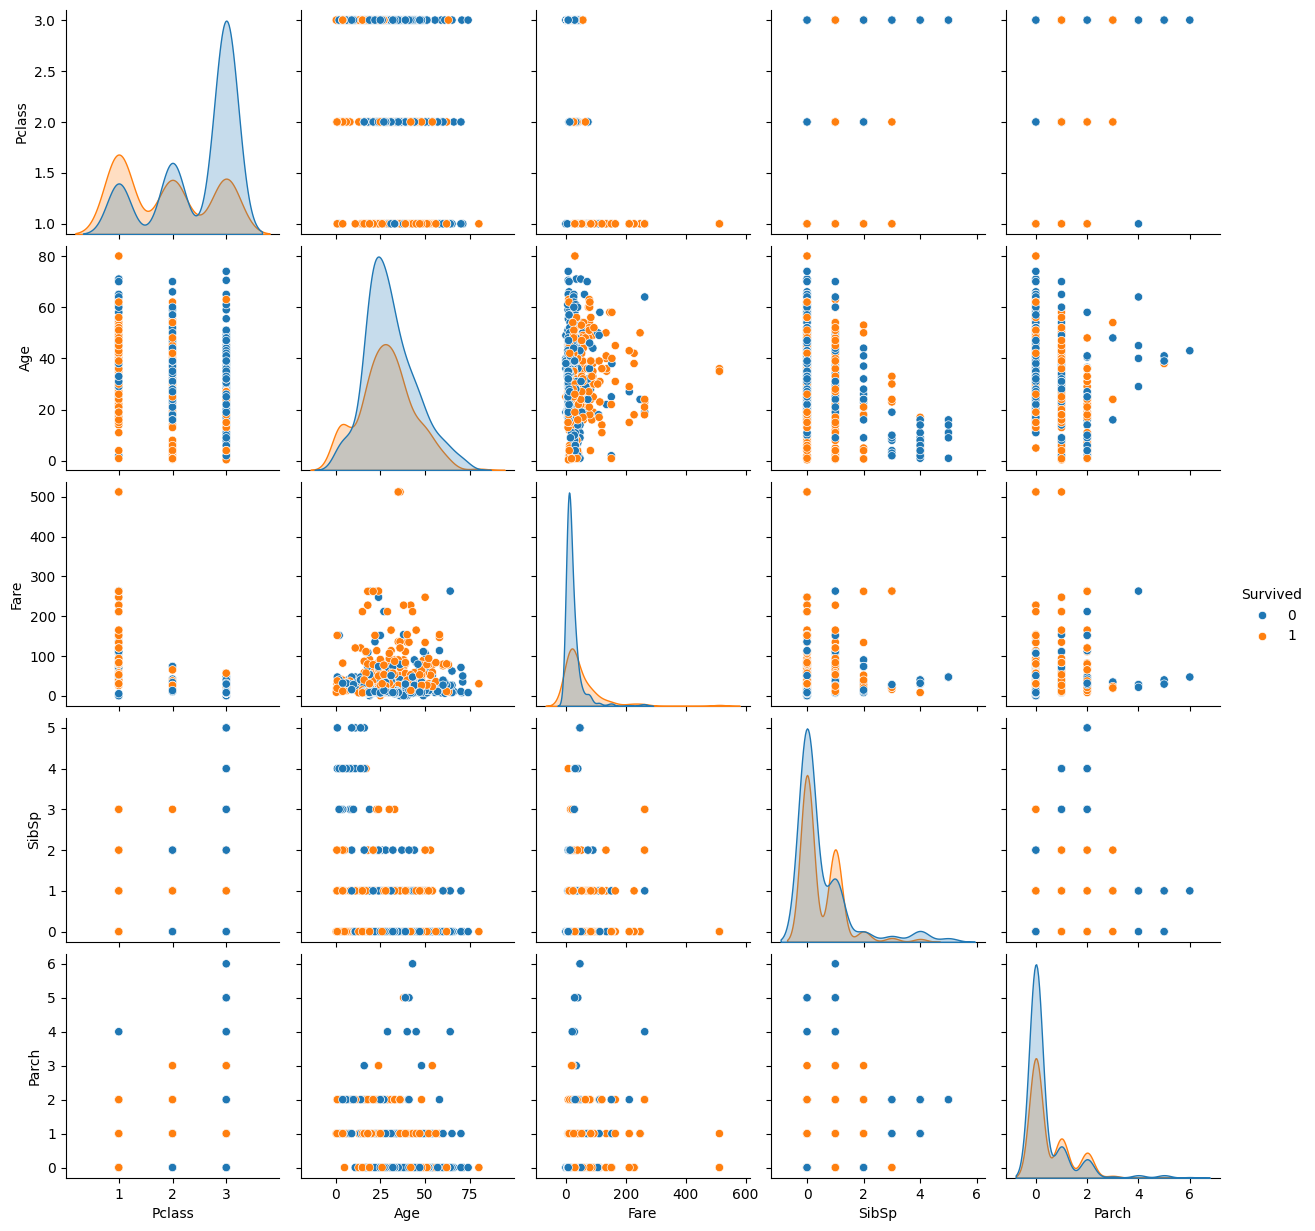

In [11]:
sns.pairplot(train[['Survived','Pclass','Age','Fare','SibSp','Parch']].dropna(), hue='Survived')
plt.show()

In [12]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

In [13]:
imputer_age = SimpleImputer(strategy='median')
train['Age'] = imputer_age.fit_transform(train[['Age']])
test['Age'] = imputer_age.transform(test[['Age']])

In [14]:
imputer_embarked = SimpleImputer(strategy='most_frequent')
train['Embarked'] = imputer_embarked.fit_transform(train[['Embarked']]).ravel()
test['Embarked'] = imputer_embarked.transform(test[['Embarked']]).ravel()

In [15]:
if test['Fare'].isnull().sum() > 0:
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [16]:
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

In [17]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test

In [18]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [19]:
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Train Precision:', precision_score(y_train, y_pred_train))
print('Train Recall:', recall_score(y_train, y_pred_train))
print('Train F1-score:', f1_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Train Accuracy: 0.8002244668911336
Train Precision: 0.7611464968152867
Train Recall: 0.6988304093567251
Train F1-score: 0.7286585365853658
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [20]:
y_train_proba = model.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
roc_auc = roc_auc_score(y_train, y_train_proba)

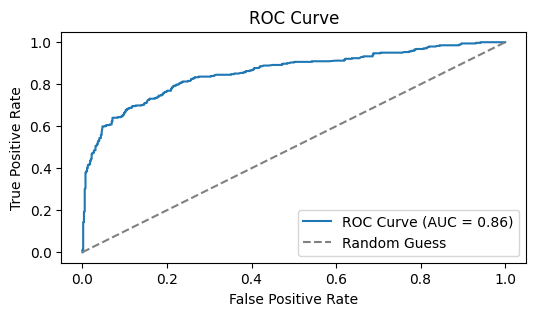

In [27]:
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [28]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coef': model.coef_[0]})
print(coefficients.sort_values('Coef', ascending=False))

    Feature      Coef
5      Fare  0.002159
2       Age -0.038025
4     Parch -0.084810
6  Embarked -0.213879
3     SibSp -0.316211
0    Pclass -1.050664
1       Sex -2.631109


In [29]:
from pickle import dump

In [30]:
dump(model, open('model.pkl', 'wb'))